# Configuration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import des libraries
import numpy as np
import pandas as pd
# import des libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 8)
import seaborn as sns
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importation df 

In [0]:
data = pd.read_csv("/content/drive/My Drive/DATASETS/data_full_clean.csv")
population = pd.read_csv("/content/drive/My Drive/DATASETS/population.csv")
gini = pd.read_csv("/content/drive/My Drive/DATASETS/country_gini.csv")
gini_wb = pd.read_csv("/content/drive/My Drive/DATASETS/gini_wb.csv")

In [0]:
# recherche valeur nulles
print(pd.isnull(data).sum())

country            0
year_survey        0
quantile           0
nb_quantiles       0
income             0
gdpppp             0
gini               0
pop                0
region             0
year            1300
IGEincome          0
AVGincome          0
dtype: int64


### Calcul % population concerné

In [0]:
pop_revenus = data.groupby(["country", "pop"]).mean()
pop_revenus = pop_revenus.reset_index()
pop_revenus = pop_revenus[["country","pop"]]
len(np.unique(data["country"]))

116

* 116 pays concernés par l'analyse

In [0]:
print(round(((pop_revenus["pop"].sum())/(population["pop"].sum()))*100,1))

92.3


* 92.3% population mondiale concernées

# Descriptif

In [0]:
data.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp,gini,pop,year,IGEincome,AVGincome
count,11600.000000,11600.000000,11600.0,11600.000000,11600.000000,11600.000000,11600.000000,10300.000000,11600.000000,11600.000000
mean,2007.982759,50.500000,100.0,6069.121925,12412.282077,0.378707,54.014603,1962.961165,0.507329,6069.121925
std,0.909593,28.867314,0.0,9413.786596,13109.423699,0.089326,171.436697,6.877794,0.183074,6632.479604
min,2004.000000,1.000000,100.0,16.719418,303.193050,0.230000,0.309000,1960.000000,0.112876,276.016044
25%,2008.000000,25.750000,100.0,900.768508,2577.500000,0.310000,4.694500,1960.000000,0.366551,1374.270126
50%,2008.000000,50.500000,100.0,2403.492950,7488.500000,0.360000,13.918000,1960.000000,0.480489,3287.174692
75%,2008.000000,75.250000,100.0,7515.313700,17679.250000,0.432500,40.474750,1960.000000,0.660000,7077.900152
max,2011.000000,100.000000,100.0,176928.550000,73127.000000,0.670000,1383.986000,1980.000000,0.966865,26888.511518


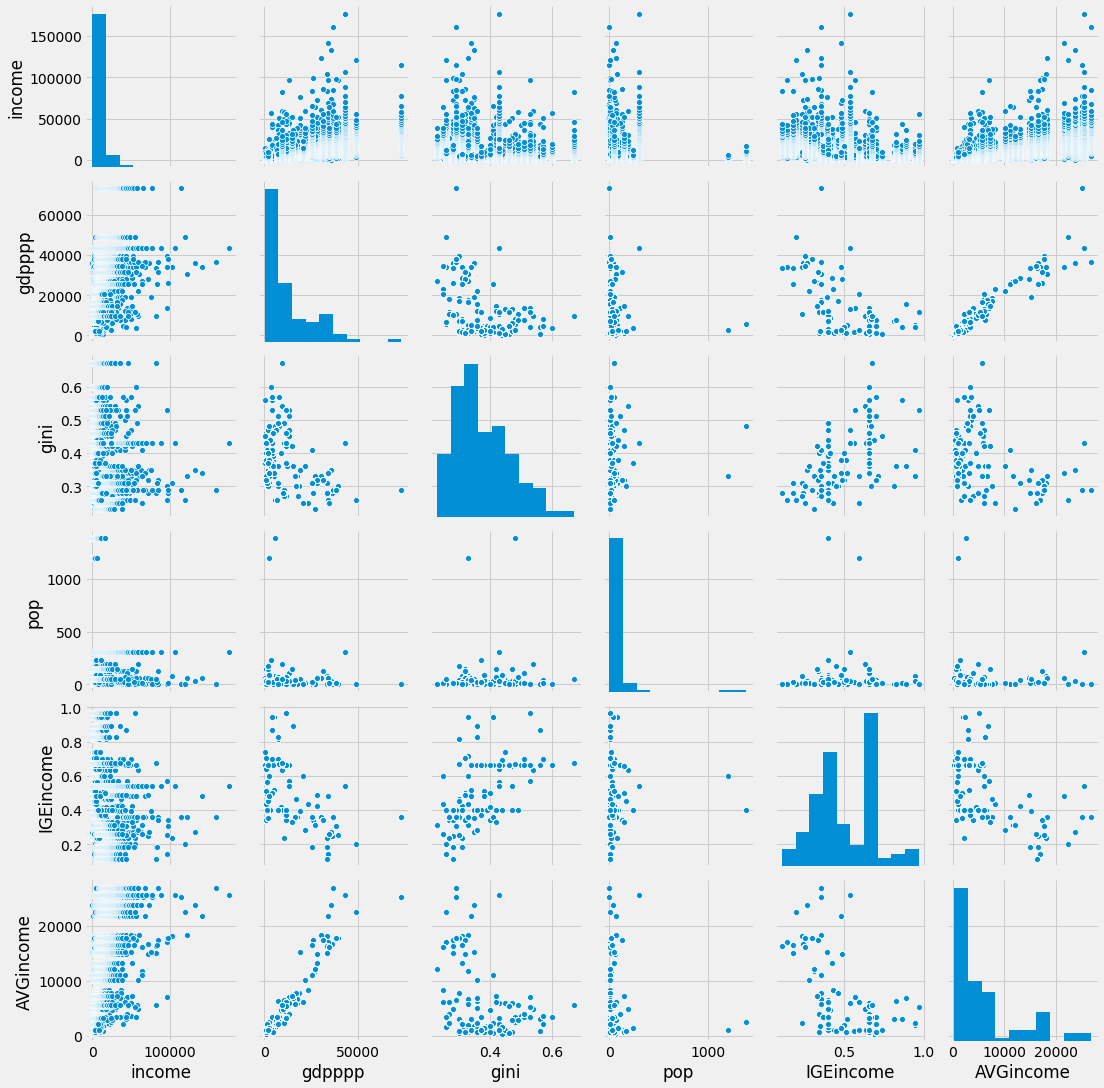

In [0]:
cols = ["income","gdpppp","gini","pop","IGEincome", "AVGincome"]
sns.pairplot(data[cols])

* Distribution asymetrique pour toutes les variables

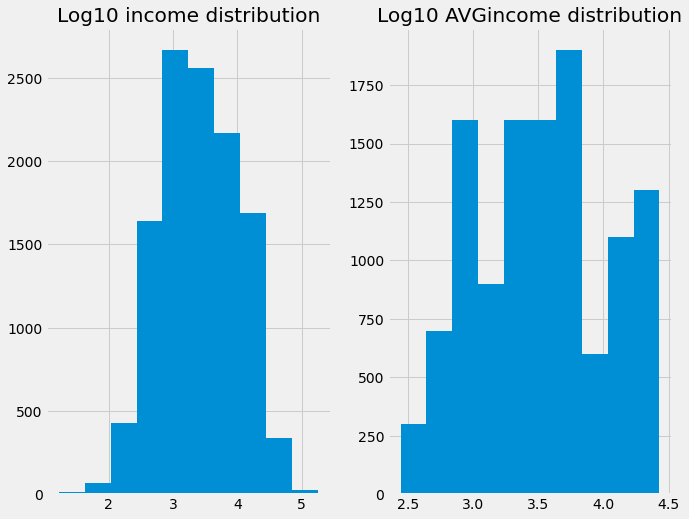

In [0]:
data["log_income"] = np.log10(data["income"])
data["log_AVGincome"] = np.log10(data["AVGincome"])

# graphiques log 
plt.subplot(121)
data["log_income"].hist()
plt.title('Log10 income distribution')
plt.subplot(122)
data["log_AVGincome"].hist()
plt.title('Log10 AVGincome distribution')
plt.show()

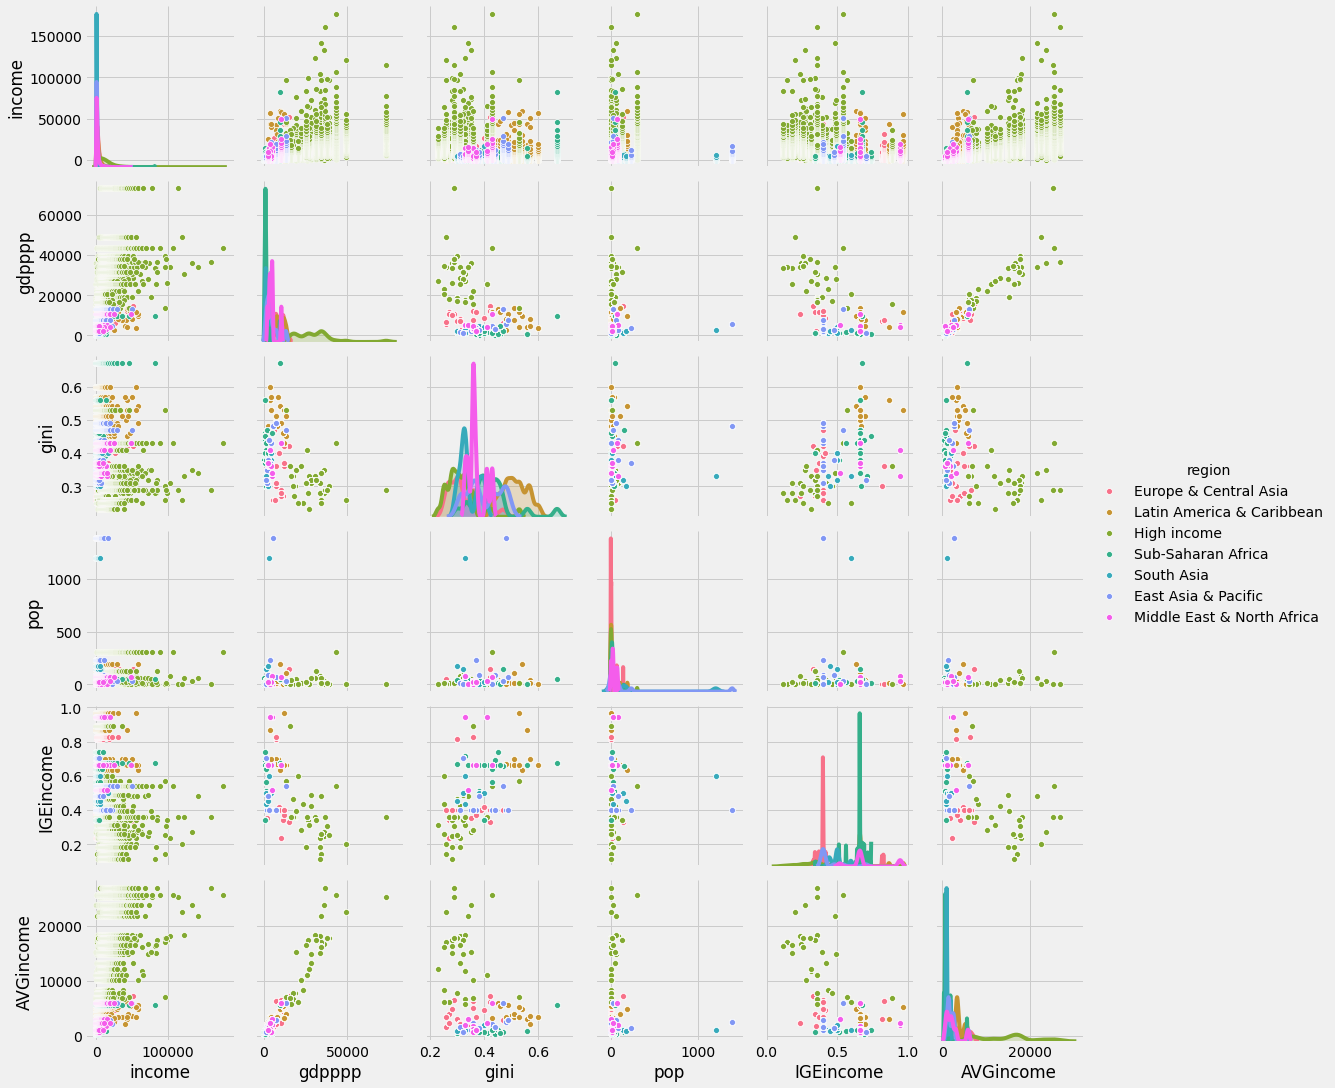

In [0]:
cols = ["income","gdpppp","gini","pop","IGEincome", "region", "AVGincome"]
sns.pairplot(data[cols], hue = "region" )

Text(0.5, 1.0, 'Population distribution')

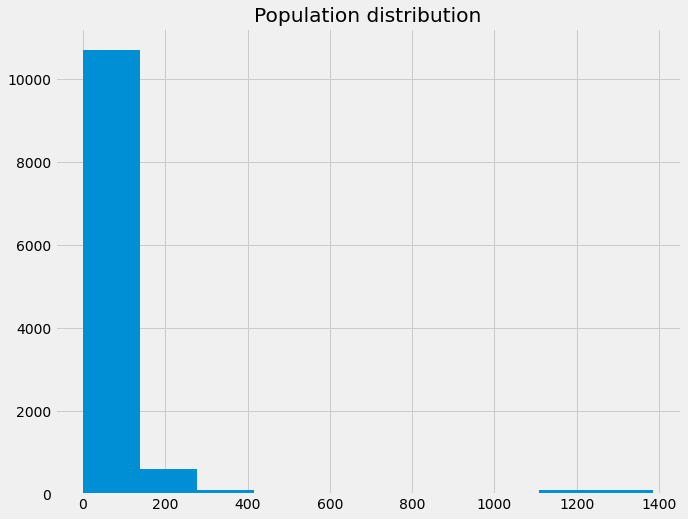

In [0]:
data["pop"].hist()
plt.title('Population distribution')

In [0]:
population.sort_values(by=['pop'], inplace=True, ascending=False)
population.head(5)

,Zone,Code zone,pop
41,Chine,CPR,1382.886
81,Inde,IND,1197.326
218,États-Unis d'Amérique,USA,303.016
82,Indonésie,IDN,235.146
30,Brésil,BRA,191.636


* Chine et Inde en outliers sur population.

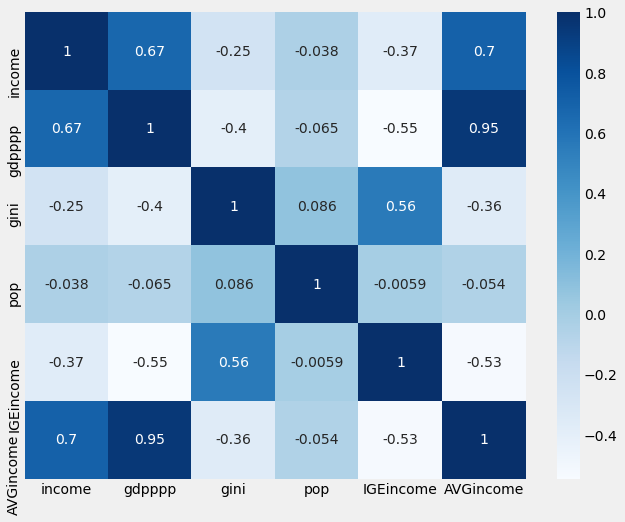

In [0]:
# Matrice corrélations
cols = ["income","gdpppp","gini","pop","IGEincome", "AVGincome"]
corr_matrix=data[cols].corr()

sns.heatmap(corr_matrix,annot=True,cmap="Blues")

* Corrélation très importante gdpppp et IGEincome

# Classification

In [0]:
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

### Centrage réduction

In [0]:
# préparation des données pour centrage et réduction
data_country = data[["country","gdpppp",	"gini"]]
data_country = data_country.groupby(["country" ]).mean()
# Centrage et Réduction

Z = data_country[["gdpppp",	"gini"	]].values
std_scale = preprocessing.StandardScaler().fit(Z)
Z_scaled = std_scale.transform(Z)
ind = data_country.index
variables = data_country.columns[0:2]

temp = pd.DataFrame(data=Z_scaled, index=ind, columns=variables)

temp["country"] = data_country.index

# conservation données centrées et réduites
data_scaled = temp

data_scaled.set_index("country", inplace = True)

## HCPC




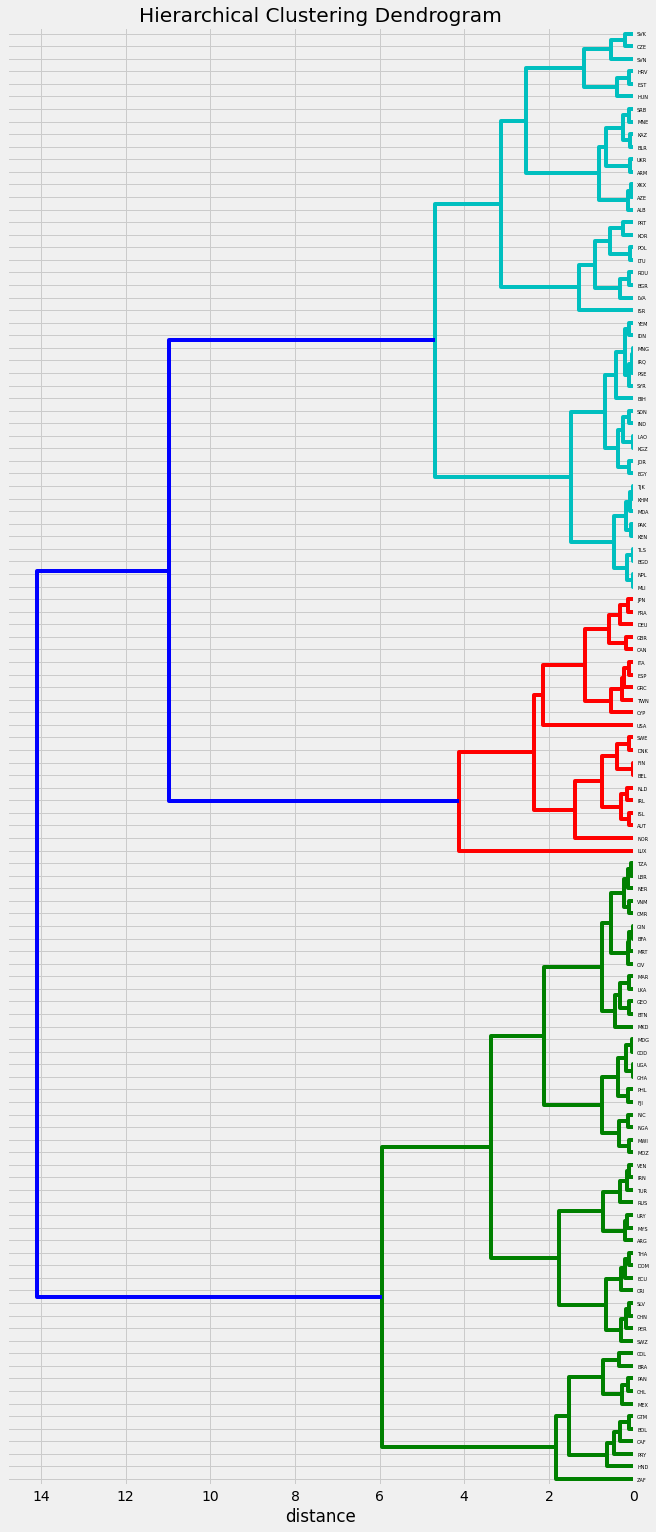

In [0]:
# préparation des données pour le clustering
X = data_country.values
names = data_country.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(Z_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

* Trop grand nombre de clusters possible

## Silhouette kmeans

[0.73038205 0.63270807 0.641872   0.62530266 0.62489368 0.63636209
 0.59132272 0.60214199 0.6040704 ]


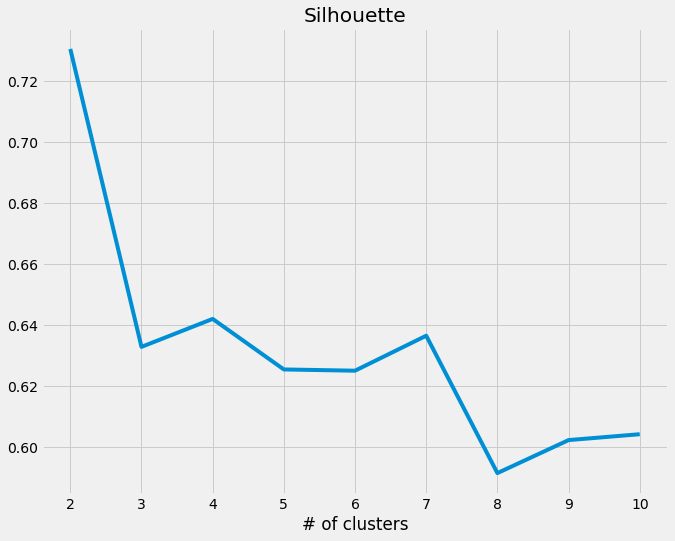

In [0]:
#librairie pour évaluation des partitions
from sklearn import cluster
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
  km = cluster.KMeans(n_clusters=k+2)
  km.fit(data_country)
  res[k] = metrics.silhouette_score(data_country,km.labels_)
print(res)
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

* 7 clusters semble idéal

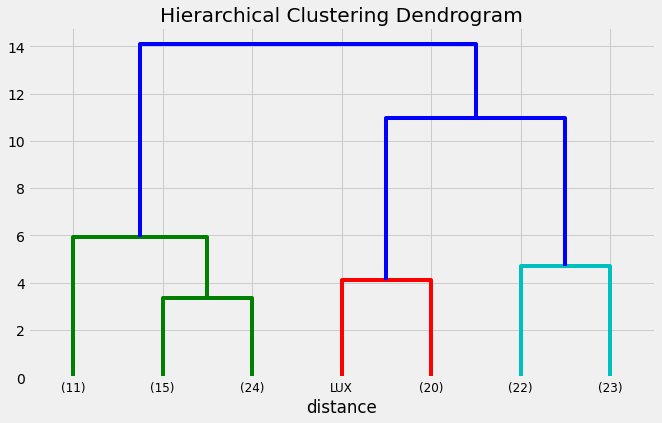

In [0]:
# fonction 7 clusters
def plot_dendrogram_7(Z, names):
    plt.figure(figsize=(10,6))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
      Z,
      truncate_mode='lastp',  # show only the last p merged clusters
      p=7,  # show only the last p merged clusters
      labels = names,
)
    plt.show()
# Affichage du dendrogramme
plot_dendrogram_7(Z, names)

In [0]:
# fonction ACP
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        

### Kmeans


In [0]:
# choix du nombre de composantes à calculer
n_comp = 2

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data_country[["gdpppp",	"gini"]]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_country.index # ou data.index pour avoir les intitulés
features = data_country.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

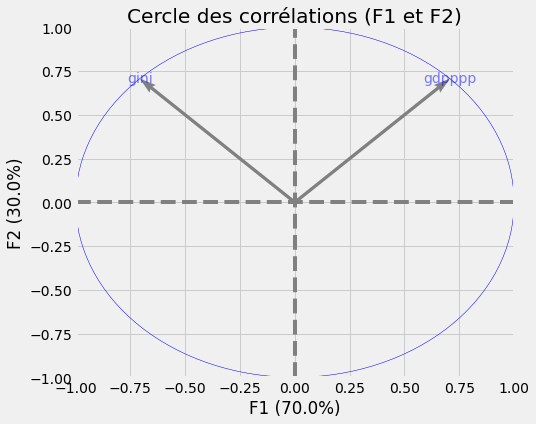

In [0]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

### Projection individus

Text(0.5, 1.0, 'Projection individus selon cluster sur 1er plan')

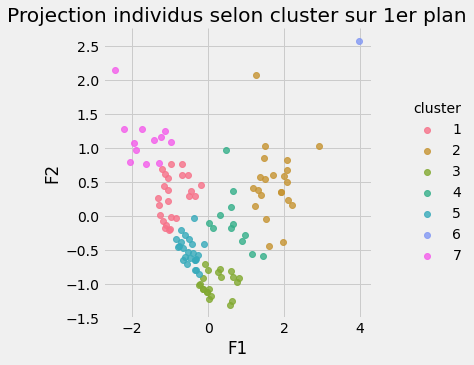

In [0]:
# Nombre de clusters souhaités
n_clust = 7

# selection des colonnes à prendre en compte dans l'ACP
data_km = data_scaled[["gdpppp",	"gini"	]] # gdpp + gini

# préparation des données pour l'ACP
X = data_km.values

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(data_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_
# conversion en data frame
clusters = pd.DataFrame(clusters)
clusters.columns=["cluster"]
clusters.cluster=clusters.cluster+1 # cluster commencent à 1

# Projection des individus
X_projected = pca.transform(X_scaled)

# Obtention F1 & F2
data_fn = pd.DataFrame(X_projected, index=data_country.index,columns=["F"+str(i+1) for i in range(2)])
data_fn = data_fn.reset_index()

# merge cluster & data_1
temp_cluster = pd.concat([clusters, data_fn], axis=1)

sns.lmplot(x="F1", y = "F2", hue="cluster", data=temp_cluster, fit_reg=False)
plt.title('Projection individus selon cluster sur 1er plan')

### Caractérisation clusters

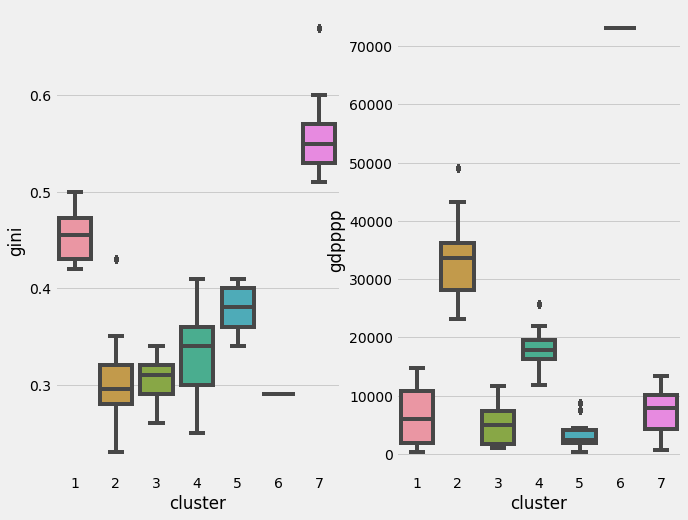

In [0]:
clusters = temp_cluster[["country", "cluster"]]

# merge cluster & data
data = pd.merge(data,clusters,left_on= "country", right_on= "country")

# graphiques variables selon clusters
plt.subplot(121)
sns.boxplot(x=data["cluster"], y = data["gini"])
plt.subplot(122)
sns.boxplot(x=data["cluster"], y = data["gdpppp"])
plt.show()

Text(0.5, 1.0, 'Composition des clusters')

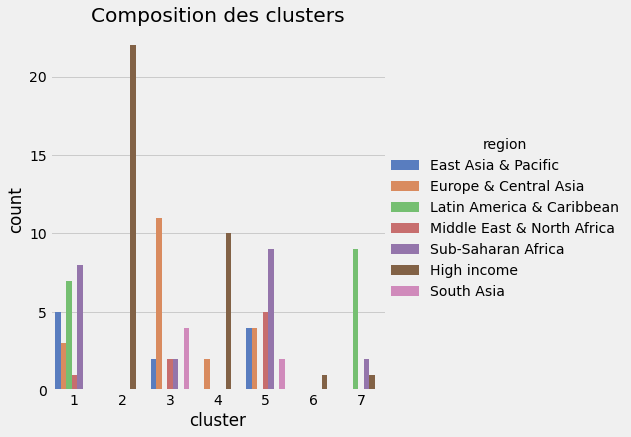

In [0]:
region_cluster = data.groupby(['cluster','region']).size().reset_index(name='count')
region_cluster["count"] = region_cluster["count"]/100
sns.catplot(x="cluster", y="count", hue="region", data=region_cluster,
                height=6, kind="bar", palette="muted")
plt.title('Composition des clusters')

### Détermination centroides pour sélection pays représentatifs

In [0]:
# calcul Centroides
cent_cluster = temp_cluster.groupby(by="cluster").mean()

# renommage colonnes
cent_cluster.columns = ["cent_F1","cent_F2"]
cent_cluster = cent_cluster.reset_index()

# ajout des coordonées centroides sur les individus
temp_cluster = pd.merge(temp_cluster,cent_cluster,left_on= "cluster", right_on= "cluster")

# calcul distance manhatan entre indiv et centroides
temp_cluster["diff_F1"] = temp_cluster["F1"]- temp_cluster["cent_F1"]
temp_cluster["diff_F2"] = temp_cluster["F2"]- temp_cluster["cent_F2"]
temp_cluster["diff"] = abs(temp_cluster["diff_F2"]+ temp_cluster["diff_F1"])

# obtention plus petite différence entre indiv et centroides
temp_cluster.sort_values(by=["diff"], inplace=True, ascending=True)
diff_cluster = temp_cluster.groupby(by="cluster").min()
diff_cluster = diff_cluster.reset_index()
diff_cluster.head(10)

,cluster,country,F1,F2,cent_F1,cent_F2,diff_F1,diff_F2,diff
0,1,ARG,-1.332451,-0.205924,-0.926837,0.281087,-0.405614,-0.487011,0.016894
1,2,AUT,1.179093,-0.435745,1.741199,0.495058,-0.562105,-0.930803,0.045315
2,3,ALB,-0.233812,-1.306593,0.193595,-0.992231,-0.427408,-0.314362,0.000169
3,4,BGR,0.034929,-0.581818,0.661565,-0.070014,-0.626636,-0.511804,0.011696
4,5,BFA,-0.834945,-0.849458,-0.499343,-0.511854,-0.335603,-0.337604,0.014226
5,6,LUX,3.977255,2.572787,3.977255,2.572787,0.000000,0.000000,0.000000
6,7,BOL,-2.457565,0.762637,-1.671633,1.145946,-0.785931,-0.383309,0.002212


In [0]:
# création liste sélection pays représentatif
list_country = []

# boucle de sélection du pays avec plsu petite dist avec centroides
for i in temp_cluster["cluster"] :
  min = diff_cluster[diff_cluster["cluster"]==i]["diff"].min()
  list_country.append(np.array(temp_cluster[temp_cluster["diff"]== min]["country"]))
  
# applatissement liste
list_country = [item for sublist in list_country for item in sublist]

# récupération de la liste de pays
list_country = list(np.unique(list_country))
print(list_country)

['BEL', 'ECU', 'EGY', 'HUN', 'IRQ', 'LUX', 'SLV']


## Distribution revenus

In [0]:
# concervation données sélection
selection = data[data['country'].isin(list_country)]

In [0]:
import matplotlib.cm as cm

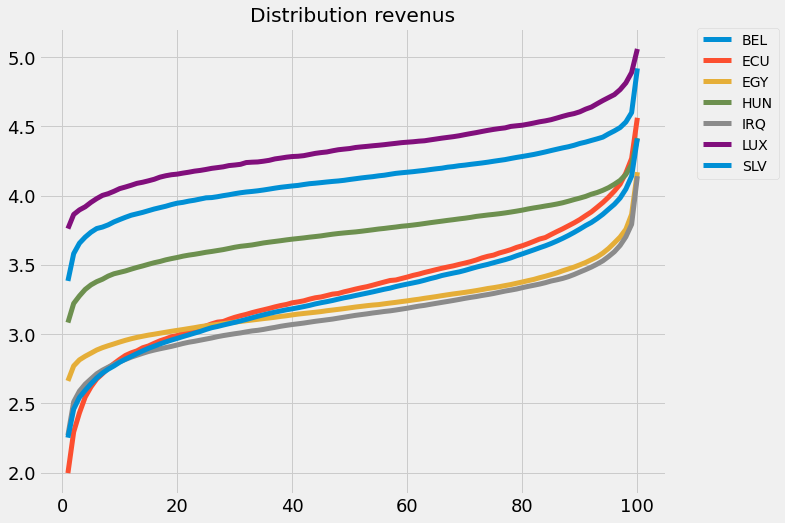

In [0]:
# Graphique distribution revenus en log10
labels = []

for i in list_country : 
  plt.plot(range(1,101), np.log10(selection.income[selection["country"]==i]), linewidth=5 )
  if i not in labels:
    labels.append(i)
plt.legend(labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title('Distribution revenus')
plt.show()

## Lorenz

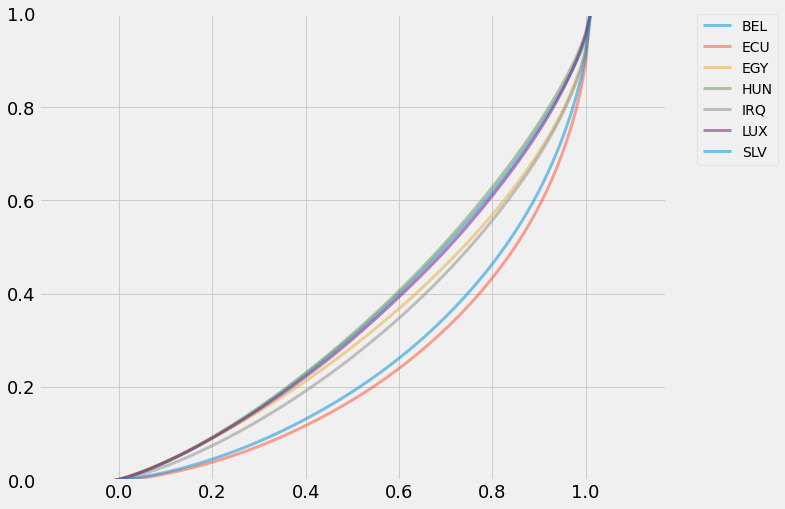

In [0]:
# graphique lorenz pour sélection pays
plt.axes().axis('equal')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

plt.ylim(ymax = 1, ymin = 0) 
plt.xlim(xmax = 1, xmin = 0) 

labels = []

for i in list_country : 
  inc = selection.income[selection["country"]==i]
  n = len(inc)
  lorenz = np.cumsum(np.sort(inc)) / inc.sum()
  lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
  xaxis = np.linspace(0-1/n,1+1/n,n+1)
  plt.plot(xaxis,lorenz, linewidth=3,alpha = 0.5 )
  if i not in labels:
    labels.append(i)

plt.legend(labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Evolution Gini


In [0]:
gini_wb.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Evolution indice Gini')

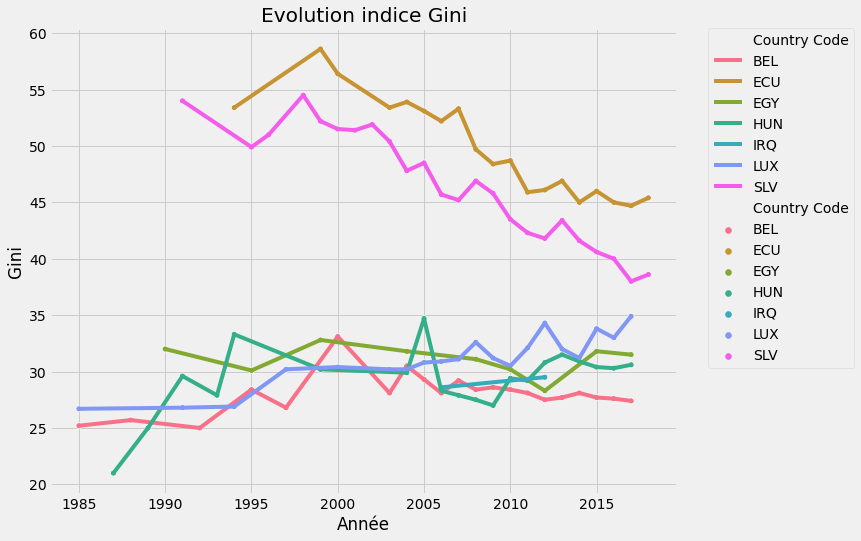

In [0]:
# conservation gini pays sélectionés
selection_gini = gini_wb[gini_wb['Country Code'].isin(list_country)]

# changement format large en long
gini_melt = pd.melt(selection_gini, id_vars =['Country Name', "Country Code","Indicator Name","Indicator Code"],
                    value_vars =["1960", '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'])

gini_melt.sort_values(by=['variable'], inplace=True)

years = list(np.unique(list(gini_melt["variable"])))



sns.lineplot(x=gini_melt["variable"].astype(int), y="value", data=gini_melt,
             hue = "Country Code", sort=False)

sns.scatterplot(x=gini_melt["variable"].astype(int), y="value", data=gini_melt,
             hue = "Country Code")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Année")
plt.ylabel("Gini")
plt.title("Evolution indice Gini")

In [0]:
# calcul gini par pays
gini_class = pd.DataFrame(data.groupby(["country"]).mean())
gini_class = gini_class.reset_index()
gini_class.sort_values(by=['gini'], inplace=True, ascending=False)
gini_class = gini_class.reset_index()
del gini_class['index']
print("Gini moyen :",gini_class["gini"].mean())
print("Top 5" , list(gini_class["country"].head(5)))
print("Bottom 5" , list(gini_class["country"].tail(5)))

Gini moyen : 0.37870689655172407
Top 5 ['ZAF', 'HND', 'GTM', 'COL', 'BOL']
Bottom 5 ['ARM', 'SWE', 'CZE', 'SVK', 'SVN']


* Gini moyen = 0,38
* Top 5 (inégalitaires) = 'ZAF', 'HND', 'GTM', 'COL', 'BOL'
* Bottom 5 (égalitaires) = 'ARM', 'SWE', 'CZE', 'SVK', 'SVN'

In [0]:
gini_class[gini_class["country"]=="FRA"]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,pop,year,IGEincome,AVGincome,log_income,log_AVGincome,cluster
73,FRA,2008.0,50.5,100.0,18309.407545,30357.0,0.33,62.133,1960.0,0.357105,18309.407545,4.183149,4.262674,2


* France 74 sur 116 pays les plus in-égalitaires, 42 eme plus égalitaire.


## gdppp


In [0]:
selection_mean = selection.groupby(["country"]).mean()
selection_mean = selection_mean.reset_index()
selection_mean.head(5)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,gini,pop,year,IGEincome,AVGincome,log_income,log_AVGincome,cluster
0,BEL,2008.0,50.5,100.0,15024.614176,33561.0,0.28,10.770,1960.0,0.183176,15024.614176,4.115958,4.176803,2
1,ECU,2008.0,50.5,100.0,3383.741001,7560.0,0.51,14.502,1960.0,0.698087,3383.741001,3.322773,3.529397,7
2,EGY,2009.0,50.5,100.0,1969.577399,5011.0,0.33,79.620,1960.0,0.943205,1969.577399,3.215676,3.294373,3
3,HUN,2008.0,50.5,100.0,6101.341229,18004.0,0.27,9.995,1960.0,0.356179,6101.341229,3.730212,3.785425,4
4,IRQ,2008.0,50.5,100.0,1705.512343,3171.0,0.36,28.500,1960.0,0.660000,1705.512343,3.134796,3.231855,5


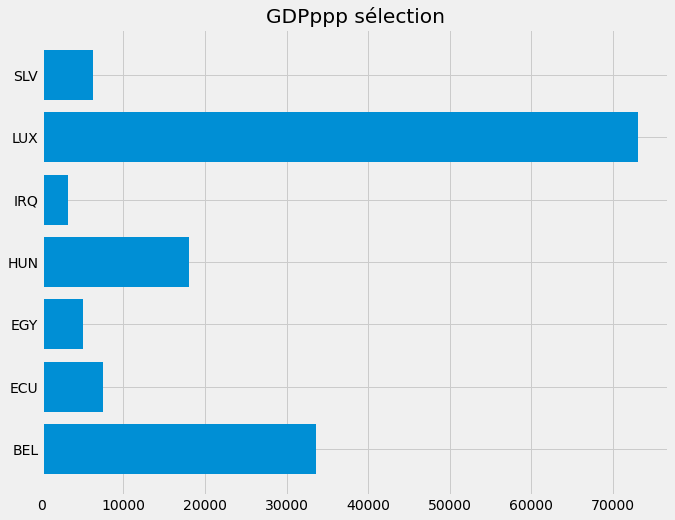

In [0]:
height = selection_mean["gdpppp"]
bars = selection_mean["country"]
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.title('GDPppp sélection')
plt.show()


# MODELISATION

## Création table finale

In [0]:
import scipy.stats as st
import pandas as pd
import numpy as np
from collections import Counter

In [0]:
%%time

# création df final parent/enfant
columns=['country', 'ln_yparent', 'epsilone', 'pj', 'ychild', 'cparent', 'cchild']
parent_child = pd.DataFrame(columns=columns)

# Génération un grand nombre de réalisations 1000*nb de quantile
n = 1000 * 100

# fonction calcul revenu enfant
def ychild(row):    
    return np.exp(row['pj'] * row['ln_yparent'] + row['epsilone'])

# boucle pour données df parent/enfant
for country in data.country.drop_duplicates():

    # récupération IGEincome du pays
    pj = data[data.country == country]['IGEincome'].iloc[0]

    # Génération valeurs fictives
    s1 = pd.Series(np.random.normal(size=n))
    s1.name = "ln_yparent"
    s2 = pd.Series(np.random.normal(size=n))
    s2.name = "epsilone"
    # Concatenate
    temp_df = pd.concat([s1, s2], axis=1)
    
    # Assignation pj
    temp_df['pj'] = pj

    # Application fonction ychild aux données générées
    temp_df['ychild'] = temp_df.apply(ychild, axis=1)

    # Calcul classe parent
    percentiles = np.argsort(np.argsort(temp_df['ln_yparent'])) * 100. / (len(temp_df['ln_yparent']) - 1)
    percentiles = np.ceil(percentiles).astype(int)
    temp_df['cparent'] = percentiles

    # Calcul classe enfant
    percentiles = np.argsort(np.argsort(temp_df['ychild'])) * 100. / (len(temp_df['ychild']) - 1)
    percentiles = np.ceil(percentiles).astype(int)
    temp_df['cchild'] = percentiles

    # Ajout pays
    temp_df['country'] = country

    # Attribution données générées
    parent_child = parent_child.append(temp_df, sort=False)



CPU times: user 8min 5s, sys: 2.48 s, total: 8min 7s
Wall time: 8min 7s


In [0]:
# dimensions
parent_child.shape


(11600000, 7)

In [0]:
parent_child.head(5)

,country,ln_yparent,epsilone,pj,ychild,cparent,cchild
0,ALB,0.719310,0.892368,0.815874,4.389587,77,88
1,ALB,-0.725824,-1.028415,0.815874,0.197781,24,11
2,ALB,-0.421007,-0.312034,0.815874,0.519171,34,31
3,ALB,1.405843,1.221643,0.815874,10.682802,93,97
4,ALB,1.078497,-0.157925,0.815874,2.058531,87,72


In [0]:
# sauvegarde 
parent_child.to_csv("/content/drive/My Drive/DATASETS/parent_child.csv", index=False)

In [0]:
%%time 
# création df de probabilité
data_prob = {
    'country':[],
    'c_child':[],
    'c_parent':[],
    'prob':[]
}

# Boucle de calcul probabilité
for country in data['country'].drop_duplicates():
    
    # récupération nombre d'observation par pays
    temp = parent_child[parent_child.country == country]
    len_total = len(temp)

    for c_child in range(1,101):
        
        # Probabilité par enfant nb classe enfant / nb observations pays
        this_child = temp[temp['cchild'] == c_child]
        child_prob = len(this_child) / len_total

        for c_parent in range(1,101):
            
            # Probabilité classe parent pour cette classe d'enfant/ nb observation total
            this_prob = len(this_child[this_child['cparent'] == c_parent]) / len_total

            # Probabilité d'avoir cette classe de parent sachant la classe de l'enfant
            cond_prob = this_prob / child_prob    

            # Préparation df prob
            data_prob['country'].append(country)
            data_prob['c_child'].append(c_child)
            data_prob['c_parent'].append(c_parent)
            data_prob['prob'].append(cond_prob)
            
data_prob = pd.DataFrame(data_prob)

CPU times: user 12min 57s, sys: 1.86 s, total: 12min 59s
Wall time: 12min 58s


In [0]:
#dimension
data_prob.shape

(1160000, 4)

In [0]:
data_prob.head(5)

,country,c_child,c_parent,prob
0,ALB,1,1,0.203203
1,ALB,1,2,0.102102
2,ALB,1,3,0.082082
3,ALB,1,4,0.069069
4,ALB,1,5,0.055055


In [0]:
# sauvegarde
data_prob.to_csv("/content/drive/My Drive/DATASETS/data_prob.csv", index=False)

## France

In [0]:
data_prob = pd.read_csv("/content/drive/My Drive/DATASETS/data_prob.csv")

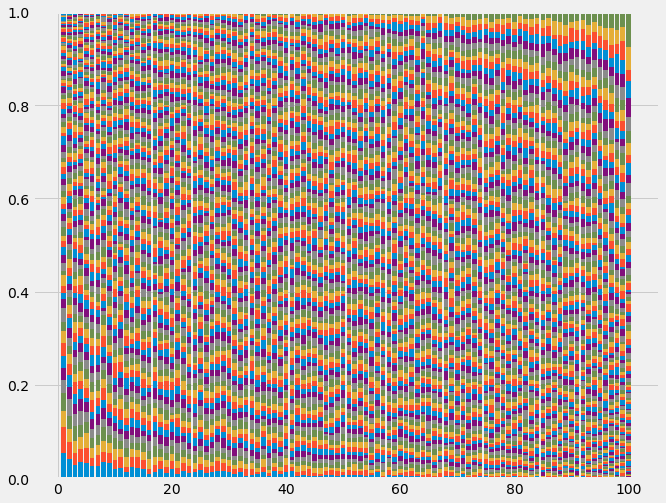

In [0]:
# nombre de classe
classes = pd.Series(np.zeros(100))

# données France
france = data_prob[data_prob.country == 'FRA']

for i in range(1,101):
    data_fra = france[france.c_parent == i].sort_values(by='c_child')
    plt.bar(data_fra['c_child'], data_fra['prob'], bottom=classes, zorder=2,label=i)
    classes = classes + data_fra['prob'].reset_index(drop=True)
    
plt.show()

## ZAF

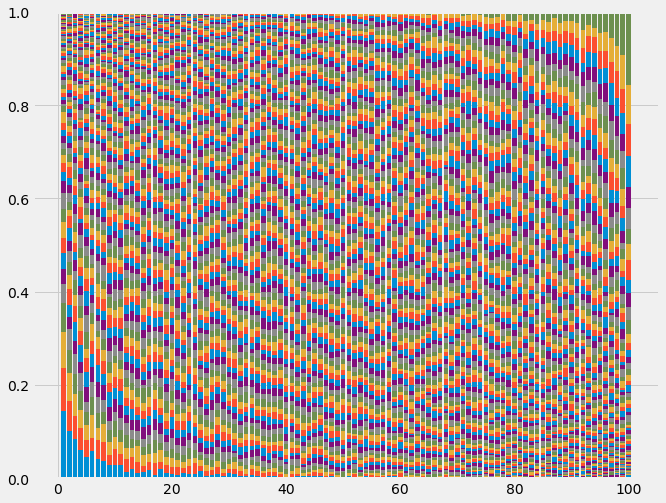

In [0]:
# nombre de classe
classes = pd.Series(np.zeros(100))

# données France
zfa = data_prob[data_prob.country == 'ZAF']

for i in range(1,101):
    data_zfa = zfa[zfa.c_parent == i].sort_values(by='c_child')
    plt.bar(data_zfa['c_child'], data_zfa['prob'], bottom=classes, zorder=2,label=i)
    classes = classes + data_zfa['prob'].reset_index(drop=True)
    
plt.show()

In [0]:
%%time 
# création df final complet
data_full = {
    'country':[],
    'quantile':[],
    'c_parent':[],
    'gini':[],
    'income':[],    
    'AVGincome':[]
}

# Row
for i in range(0,len(data)):
    row = data.iloc[i]
    temp = data_prob[data_prob['country'] == row['country']]
    temp = temp[temp['c_child'] == row['quantile']]
    
    # Parent
    for j in range(1,101):
        
        # Number of parents
        n = int(round(temp[temp['c_parent'] == j]['prob'].iloc[0] * 500))
        
        # Copy the values n times
        data_full['country'].extend([row['country']]*n)
        data_full['quantile'].extend([row['quantile']]*n)
        data_full['gini'].extend([row['gini']]*n)
        data_full['c_parent'].extend([j]*n)
        data_full['AVGincome'].extend([row['AVGincome']]*n)        
        data_full['income'].extend([row['income']]*n)
        
data_full = pd.DataFrame(data_full)

CPU times: user 26min 36s, sys: 1.88 s, total: 26min 38s
Wall time: 26min 36s


In [0]:
# sauvegarde
data_full.to_csv("/content/drive/My Drive/DATASETS/data_full.csv", index=False)

In [0]:
# dimension
data_full.shape

(5834427, 6)

In [0]:
temp_cluster.to_csv("/content/drive/My Drive/DATASETS/cluster.csv", index=False)

## MODELES

In [0]:
# import des libraries
import numpy as np
import pandas as pd
# import des libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 8)
import seaborn as sns
import time

In [0]:
# Récupération des données
temp_cluster = pd.read_csv("/content/drive/My Drive/DATASETS/cluster.csv")
data_full = pd.read_csv("/content/drive/My Drive/DATASETS/data_full.csv")
data = pd.read_csv("/content/drive/My Drive/DATASETS/data_full_clean.csv")

In [0]:
# Regroupement des données sur un seul df
data_temp = data[["country","quantile","income","region"]]

In [0]:
data_full = pd.merge(data_full,data_temp,left_on= ["country", "c_parent"], right_on= ["country", "quantile"])
data_full.rename(columns={'income_x': 'income_child', 'income_y': 'income_parent'}, inplace=True)
data_full.rename(columns={'quantile_x': 'quantile'}, inplace=True)
del data_full["quantile_y"]
data_full.head(5)
data_final = pd.merge(data_full,temp_cluster,on= "country", how = "left")
data_final.head(5)

,country,quantile,c_parent,gini,income_child,AVGincome,income_parent,region,cluster,F1,F2,cent_F1,cent_F2,diff_F1,diff_F2,diff
0,ALB,1,1,0.3,728.89795,2994.829902,728.89795,Europe & Central Asia,3,0.347146,-0.898995,0.193595,-0.992231,0.153551,0.093236,0.246787
1,ALB,1,1,0.3,728.89795,2994.829902,728.89795,Europe & Central Asia,3,0.347146,-0.898995,0.193595,-0.992231,0.153551,0.093236,0.246787
2,ALB,1,1,0.3,728.89795,2994.829902,728.89795,Europe & Central Asia,3,0.347146,-0.898995,0.193595,-0.992231,0.153551,0.093236,0.246787
3,ALB,1,1,0.3,728.89795,2994.829902,728.89795,Europe & Central Asia,3,0.347146,-0.898995,0.193595,-0.992231,0.153551,0.093236,0.246787
4,ALB,1,1,0.3,728.89795,2994.829902,728.89795,Europe & Central Asia,3,0.347146,-0.898995,0.193595,-0.992231,0.153551,0.093236,0.246787


In [0]:
# Création des données en lo 
data_final["log_income_child"] = np.log10(data_final["income_child"])
data_final["log_income_parent"] = np.log10(data_final["income_parent"])
data_final["log_AVGincome"] = np.log10(data_final["AVGincome"])

In [0]:
# chargement librairie pour modélisation
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as sp
import scipy.stats as st

In [0]:
# sauvegarde
data_final.to_csv("/content/drive/My Drive/DATASETS/data_final.csv", index=False)

In [0]:
data_final = pd.read_csv("/content/drive/My Drive/DATASETS/data_final.csv")

## ANOVA Pays et revenus moyens

Text(0.5, 1.0, 'Revenu moyen des enfants selon pays')

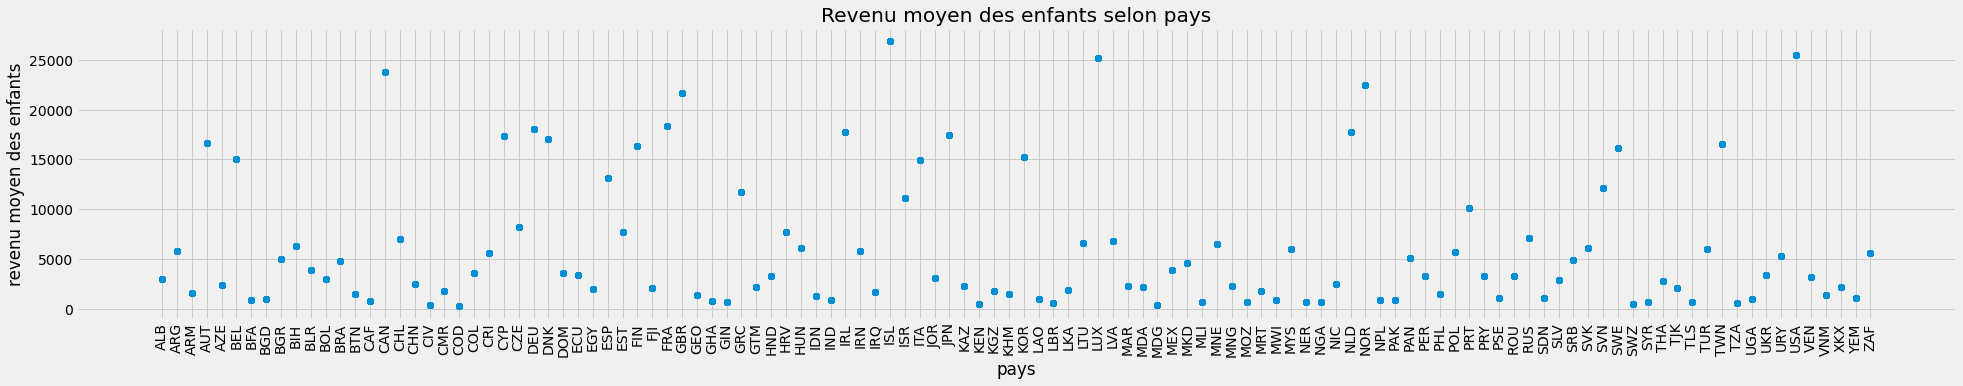

In [0]:
plt.figure(figsize=(30,5))
plt.plot(data_final["country"], data_final["AVGincome"],'o')
plt.xticks(rotation=90)
plt.xlabel('pays')
plt.ylabel('revenu moyen des enfants')
plt.title('Revenu moyen des enfants selon pays')

In [0]:
# Anova selon pays
mod = ols('income_child ~ country', data=data_final).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq         df             F  PR(>F)
country   2.563107e+14      115.0  50334.819221     0.0
Residual  2.583389e+14  5834311.0           NaN     NaN


* La P-Value très significante. Incatif de forte différences de distribution des revenus entre pays.

In [0]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:           income_child   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                 5.033e+04
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:07:33   Log-Likelihood:            -5.9639e+07
No. Observations:             5834427   AIC:                         1.193e+08
Df Residuals:                 5834311   BIC:                         1.193e+08
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2992.1211     29.753    100.

* Le pays explique à 0.49 le revenu moyen. Donc necessaire d'apporter plus de variables explicatives.

### Distribution des résidus

Text(0.5, 1.0, 'Distribution résidus')

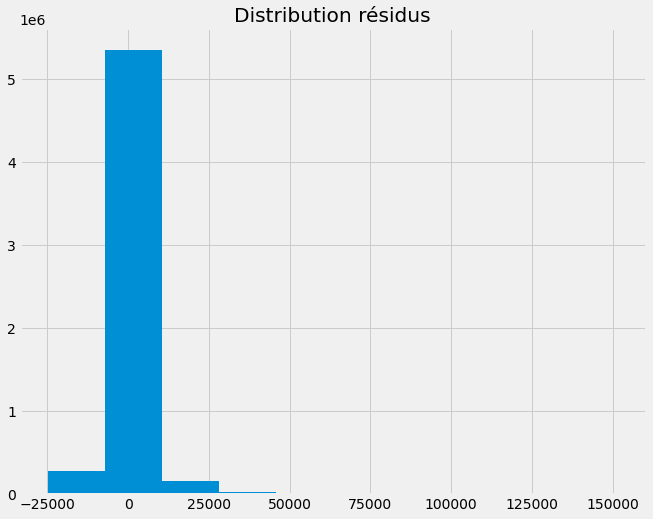

In [0]:
plt.hist(mod.resid)
plt.title('Distribution résidus')

((array([-5.16721656, -4.99884447, -4.90811873, ...,  4.90811873,
          4.99884447,  5.16721656]),
  array([-24749.19178814, -24749.19178814, -24749.19178814, ...,
         151515.88211186, 151515.88211186, 151515.88211186])),
 (4984.385531886306, 2.564799937963984e-11, 0.7490578478783005))

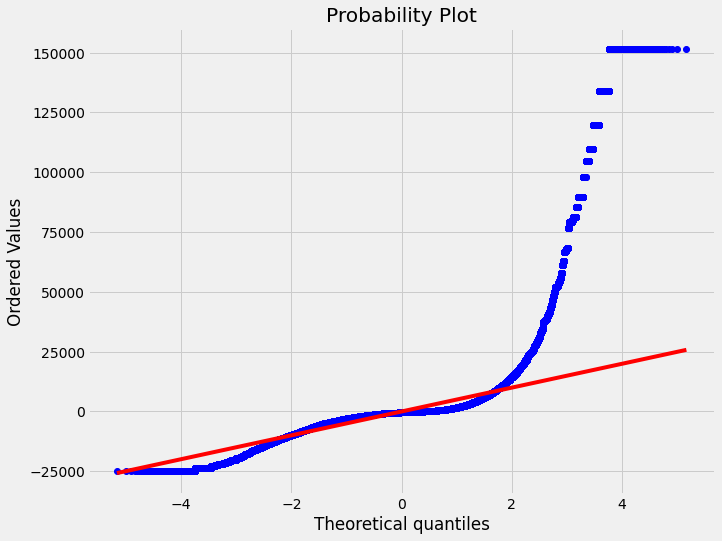

In [0]:
st.probplot(mod.resid, plot=plt)

### Variances résidus


Text(0.5, 1.0, 'Variance des résidus')

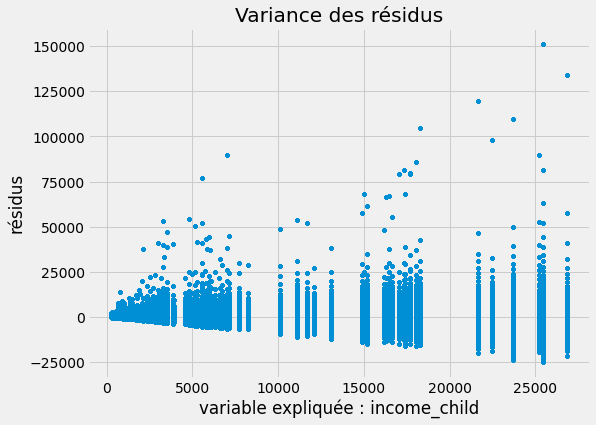

In [0]:
fig = plt.figure(figsize=(8,6))
plt.plot(mod.fittedvalues, mod.resid, '.', alpha=0.3)
plt.xlabel('variable expliquée : income_child')
_ = plt.ylabel('résidus')
plt.title('Variance des résidus')

### Adhésion loi normale des résidus
H0 : distribution selon loi normale

In [0]:
#Kolmogorov-Smirnov
from scipy.stats import ks_2samp

print("mod.resid")
print(ks_2samp(mod.resid,list(np.random.normal(np.mean(mod.resid), np.std(mod.resid), 1000))))


mod.resid
Ks_2sampResult(statistic=0.26320550158567413, pvalue=1.3739973557055343e-60)


* P < 0.05, Rejet de H0 et pas d'adhésion loi normale.

## Echantillionnage

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# défitition variable cible 
y = data_final["country"]
# création sample stratification par y
X_train, X_test, y_train, y_test= train_test_split(data_final,y, test_size=5000,stratify=y,random_state=0)

# merge pour sample
sample = X_test
print (sample.shape)

(5000, 19)


In [0]:
sample.reset_index(inplace=True)
sample.head(5)

,index,country,quantile,c_parent,gini,income_child,AVGincome,income_parent,region,cluster,F1,F2,cent_F1,cent_F2,diff_F1,diff_F2,diff,log_income_child,log_income_parent,log_AVGincome
0,737692,CAF,32,51,0.56,295.67250,811.299901,451.45926,Sub-Saharan Africa,7,-2.067761,0.802595,-1.671633,1.145946,-0.396127,-0.343352,0.739479,2.470811,2.654619,2.909181
1,2689537,JPN,22,47,0.32,9716.27200,17432.961184,14410.99100,High income,2,1.483946,0.554459,1.741199,0.495058,-0.257252,0.059401,0.197851,3.987500,4.158694,4.241371
2,4530145,PSE,5,8,0.36,348.76495,1114.098514,392.63140,Middle East & North Africa,5,-0.326882,-0.623062,-0.499343,-0.511854,0.172460,-0.111208,0.061252,2.542533,2.593985,3.046924
3,4178296,PAK,6,8,0.30,391.97046,887.839279,411.87643,South Asia,3,0.079490,-1.166651,0.193595,-0.992231,-0.114105,-0.174420,0.288524,2.593253,2.614767,2.948334
4,2444771,IRQ,20,64,0.36,834.86066,1705.512343,1641.24260,Middle East & North Africa,5,-0.350395,-0.646575,-0.499343,-0.511854,0.148947,-0.134721,0.014226,2.921614,3.215173,3.231855


In [0]:
# sauvegarde
sample.to_csv("/content/drive/My Drive/DATASETS/sample.csv", index=False)

In [0]:
del sample["index"]
sample.head(5)


,country,quantile,c_parent,gini,income_child,AVGincome,income_parent,region,cluster,F1,F2,cent_F1,cent_F2,diff_F1,diff_F2,diff,log_income_child,log_income_parent,log_AVGincome
0,CAF,32,51,0.56,295.67250,811.299901,451.45926,Sub-Saharan Africa,7,-2.067761,0.802595,-1.671633,1.145946,-0.396127,-0.343352,0.739479,2.470811,2.654619,2.909181
1,JPN,22,47,0.32,9716.27200,17432.961184,14410.99100,High income,2,1.483946,0.554459,1.741199,0.495058,-0.257252,0.059401,0.197851,3.987500,4.158694,4.241371
2,PSE,5,8,0.36,348.76495,1114.098514,392.63140,Middle East & North Africa,5,-0.326882,-0.623062,-0.499343,-0.511854,0.172460,-0.111208,0.061252,2.542533,2.593985,3.046924
3,PAK,6,8,0.30,391.97046,887.839279,411.87643,South Asia,3,0.079490,-1.166651,0.193595,-0.992231,-0.114105,-0.174420,0.288524,2.593253,2.614767,2.948334
4,IRQ,20,64,0.36,834.86066,1705.512343,1641.24260,Middle East & North Africa,5,-0.350395,-0.646575,-0.499343,-0.511854,0.148947,-0.134721,0.014226,2.921614,3.215173,3.231855


## LM : income_child ~ AVGincome + gini 

In [0]:
X = sample[['AVGincome','gini']] 
Y = sample['income_child']

X = sm.add_constant(X) #  constant

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           income_child   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     2282.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:08:23   Log-Likelihood:                -51314.
No. Observations:                5000   AIC:                         1.026e+05
Df Residuals:                    4997   BIC:                         1.027e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        369.0602    497.540      0.742      0.4

### Atypicité des observations

In [0]:
import statsmodels
from scipy.stats import t, shapiro
import random

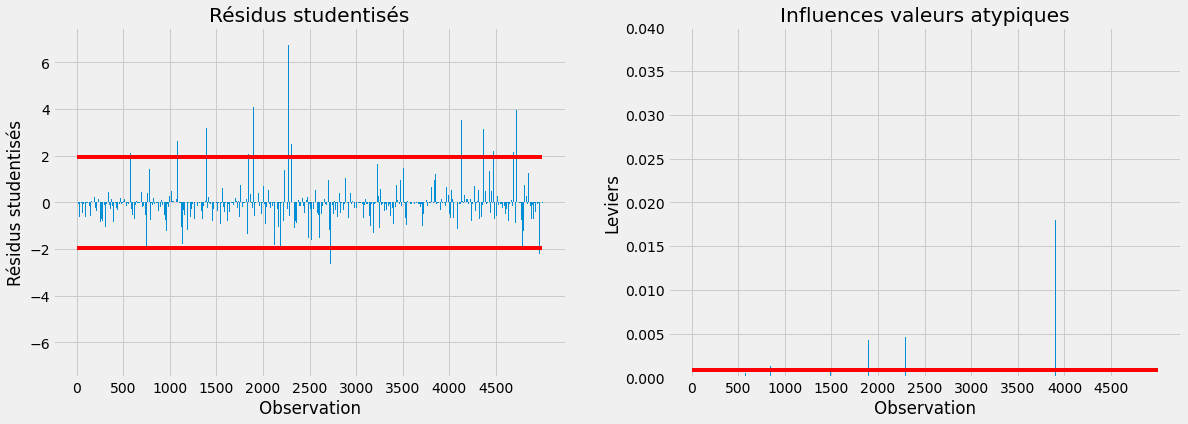

In [0]:
# Sélection du seuil
alpha = 0.05

# nb observation
n = sample.shape[0]

# nb variables
p = 2

#création df analyse
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

# Calcul levier, résidus studentisés et Cook
analyses['levier'] = model.get_influence().hat_matrix_diag
analyses['rstudent'] = model.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
influence = model.get_influence().summary_frame()
analyses['dcooks'] = influence['cooks_d']

# Calcul des seuils
seuil_levier = 2*p/n
seuil_dcook = 4/(n-p)
#Sélection observations atypiques
atypiques = analyses.loc[(analyses['rstudent'] > seuil_rstudent) | (analyses['rstudent'] < -seuil_rstudent), :]

# graphiques Résidus et distance cooks
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, n-1], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, n-1], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.ylim(-7.5, 7.5)
plt.title('Résidus studentisés')
plt.subplot(122)
plt.bar(atypiques['obs'], atypiques['dcooks'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, n-1], [seuil_dcook, seuil_dcook], color='r')
plt.ylim(0, 0.04)
plt.title('Influences valeurs atypiques')
plt.show()

In [0]:
# sélection observations atypiques et influentes
influentes = atypiques.loc[atypiques['dcooks'] > seuil_dcook, :]

#Calcul % d'observation atypiques et influentes
perct = (len(influentes)/len(sample))*100
print(len(influentes))
print(perct)

169
3.38


### Colinéarité des variables




In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
variables = model.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.1473048728573825, 1.147304872857383]

### Homoscédasticité

#### Variances résidus


Text(0.5, 1.0, 'Variance des résidus')

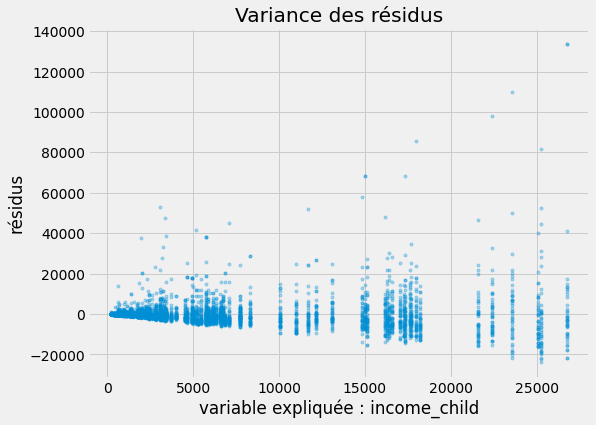

In [0]:
fig = plt.figure(figsize=(8,6))
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.3)
plt.xlabel('variable expliquée : income_child')
_ = plt.ylabel('résidus')
plt.title('Variance des résidus')

In [0]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(model.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 4.3656673200977804e-35


### Normalité des résidus

#### Distribution des résidus

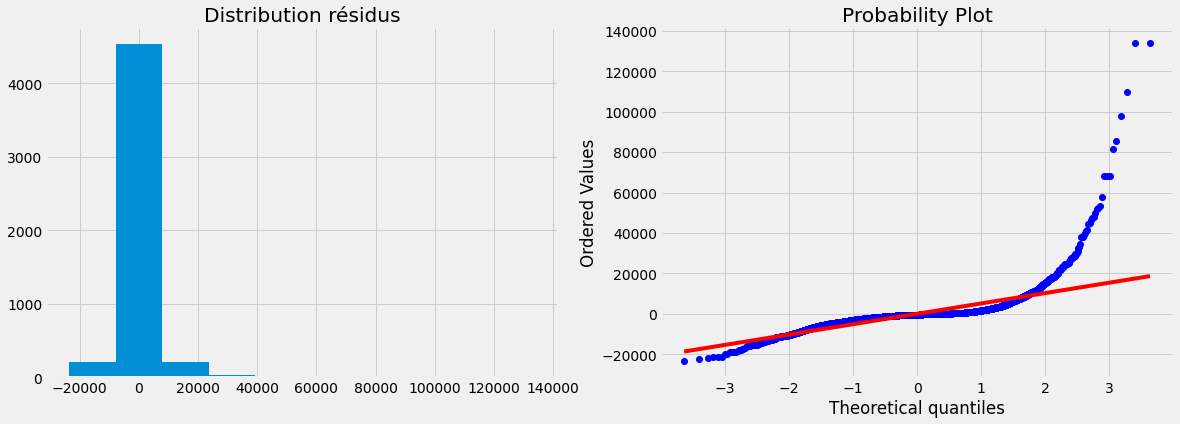

In [0]:
# graphiques 
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(model.resid)
plt.title('Distribution résidus')
plt.subplot(122)
st.probplot(model.resid, plot=plt)
plt.show()

#### Adhésion loi normale des résidus
H0 : distribution selon loi normale

In [0]:
#Kolmogorov-Smirnov
from scipy.stats import ks_2samp

print("mod.resid")
print(ks_2samp(model.resid,list(np.random.normal(np.mean(model.resid), np.std(model.resid), 1000))))


mod.resid
Ks_2sampResult(statistic=0.2456, pvalue=4.369395218661886e-44)


## LM : log_income_child ~ log_AVGincome + gini 

In [0]:
X = sample[['log_AVGincome','gini']] 
Y = sample['log_income_child']

X = sm.add_constant(X) #  constant

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       log_income_child   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     6535.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:08:41   Log-Likelihood:                -1347.5
No. Observations:                5000   AIC:                             2701.
Df Residuals:                    4997   BIC:                             2721.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2096      0.043      4.885

### Atypicité des observations

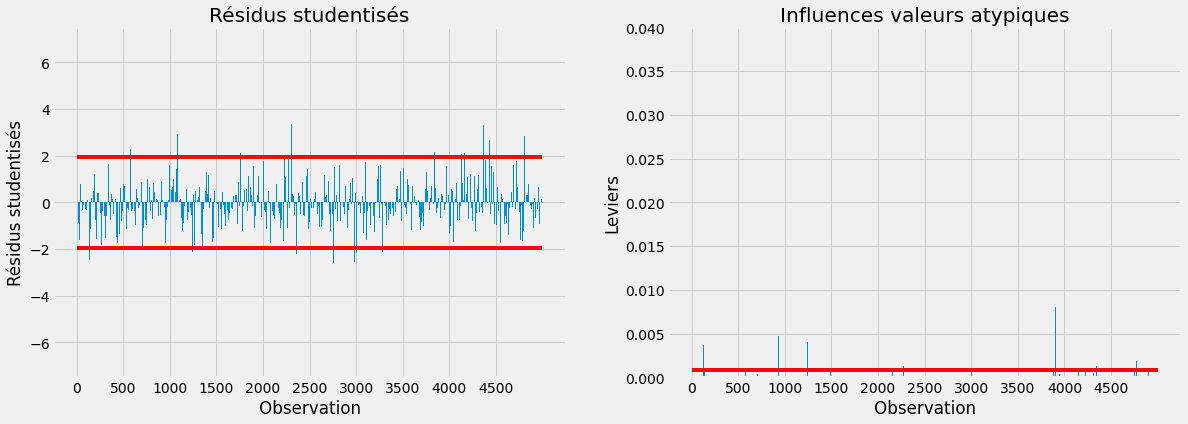

In [0]:
# Sélection du seuil
alpha = 0.05

# nb observation
n = sample.shape[0]

# nb variables
p = 2

#création df analyse
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

# Calcul levier, résidus studentisés et Cook
analyses['levier'] = model.get_influence().hat_matrix_diag
analyses['rstudent'] = model.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
influence = model.get_influence().summary_frame()
analyses['dcooks'] = influence['cooks_d']

# Calcul des seuils
seuil_levier = 2*p/n
seuil_dcook = 4/(n-p)
#Sélection observations atypiques
atypiques = analyses.loc[(analyses['rstudent'] > seuil_rstudent) | (analyses['rstudent'] < -seuil_rstudent), :]

# graphiques Résidus et distance cooks
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, n-1], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, n-1], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.ylim(-7.5, 7.5)
plt.title('Résidus studentisés')
plt.subplot(122)
plt.bar(atypiques['obs'], atypiques['dcooks'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, n-1], [seuil_dcook, seuil_dcook], color='r')
plt.ylim(0, 0.04)
plt.title('Influences valeurs atypiques')
plt.show()

In [0]:
# sélection observations atypiques et influentes
influentes = atypiques.loc[atypiques['dcooks'] > seuil_dcook, :]

#Calcul % d'observation atypiques et influentes
perct = (len(influentes)/len(sample))*100
print(len(influentes))
print(perct)

205
4.1000000000000005


### Colinéarité des variables




In [0]:
variables = model.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0788832368141885, 1.0788832368141883]

### Homoscédasticité

#### Variances résidus


Text(0.5, 1.0, 'Variance des résidus')

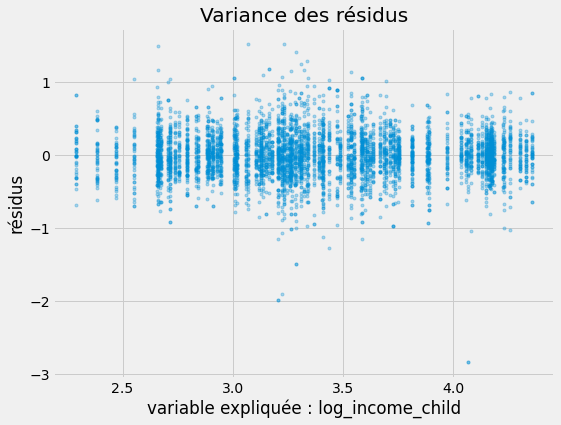

In [0]:
fig = plt.figure(figsize=(8,6))
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.3)
plt.xlabel('variable expliquée : log_income_child')
_ = plt.ylabel('résidus')
plt.title('Variance des résidus')

In [0]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(model.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 1.9069298109195986e-40


### Normalité des résidus

#### Distribution des résidus

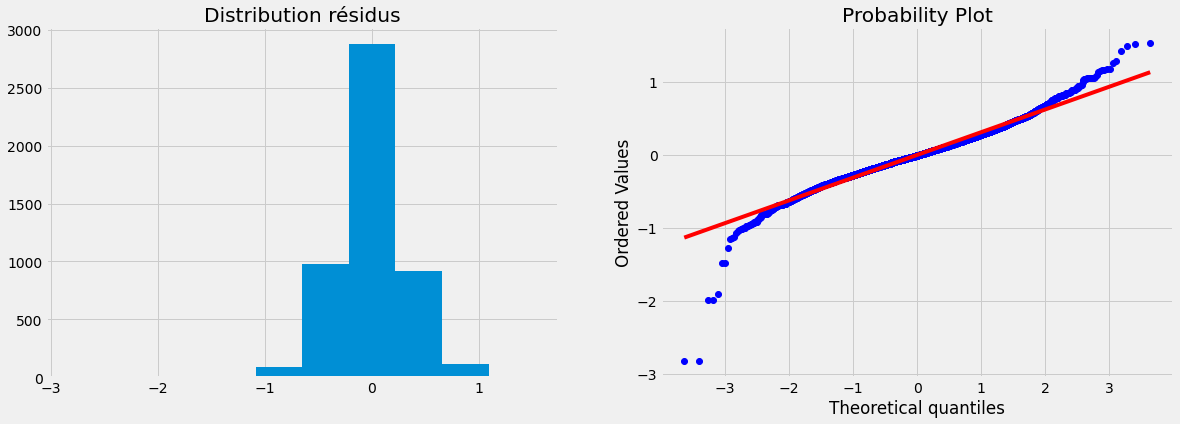

In [0]:
# graphiques 
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(model.resid)
plt.title('Distribution résidus')
plt.subplot(122)
st.probplot(model.resid, plot=plt)
plt.show()

#### Adhésion loi normale des résidus
H0 : distribution selon loi normale

In [0]:
#Kolmogorov-Smirnov
from scipy.stats import ks_2samp

print("mod.resid")
print(ks_2samp(model.resid,list(np.random.normal(np.mean(model.resid), np.std(model.resid), 1000))))


mod.resid
Ks_2sampResult(statistic=0.0452, pvalue=1.0)


## LM : income_child ~ AVGincome + gini + income_parent

In [0]:
X = sample[['AVGincome','gini','income_parent']] 
Y = sample['income_child']

X = sm.add_constant(X) #  constant

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           income_child   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1829.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:08:59   Log-Likelihood:                -51083.
No. Observations:                5000   AIC:                         1.022e+05
Df Residuals:                    4996   BIC:                         1.022e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           155.2347    475.226      0.327

### Atypicité des observations

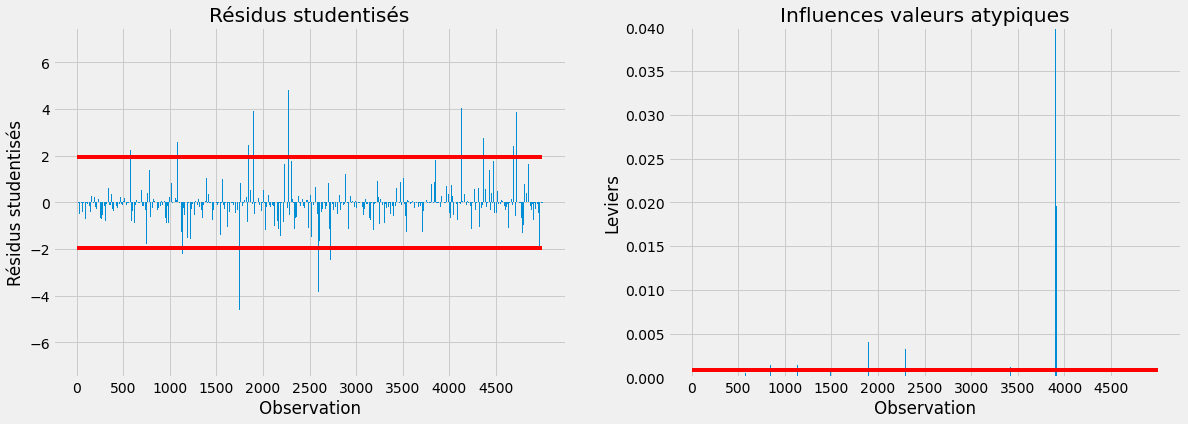

In [0]:
# Sélection du seuil
alpha = 0.05

# nb observation
n = sample.shape[0]

# nb variables
p = 3

#création df analyse
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

# Calcul levier, résidus studentisés et Cook
analyses['levier'] = model.get_influence().hat_matrix_diag
analyses['rstudent'] = model.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
influence = model.get_influence().summary_frame()
analyses['dcooks'] = influence['cooks_d']

# Calcul des seuils
seuil_levier = 2*p/n
seuil_dcook = 4/(n-p)
#Sélection observations atypiques
atypiques = analyses.loc[(analyses['rstudent'] > seuil_rstudent) | (analyses['rstudent'] < -seuil_rstudent), :]

# graphiques Résidus et distance cooks
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, n-1], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, n-1], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.ylim(-7.5, 7.5)
plt.title('Résidus studentisés')
plt.subplot(122)
plt.bar(atypiques['obs'], atypiques['dcooks'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, n-1], [seuil_dcook, seuil_dcook], color='r')
plt.ylim(0, 0.04)
plt.title('Influences valeurs atypiques')
plt.show()

In [0]:
# sélection observations atypiques et influentes
influentes = atypiques.loc[atypiques['dcooks'] > seuil_dcook, :]

#Calcul % d'observation atypiques et influentes
perct = (len(influentes)/len(sample))*100
print(len(influentes))
print(perct)

166
3.32


### Colinéarité des variables




In [0]:
variables = model.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[2.228754400405461, 1.1478391227968703, 2.0992093831869694]

### Homoscédasticité

#### Variances résidus


Text(0.5, 1.0, 'Variance des résidus')

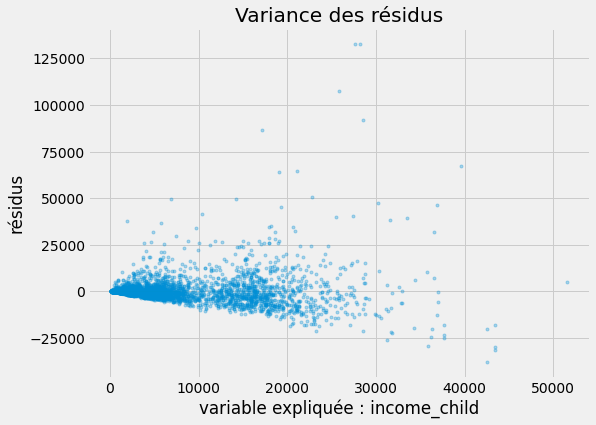

In [0]:
fig = plt.figure(figsize=(8,6))
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.3)
plt.xlabel('variable expliquée : income_child')
_ = plt.ylabel('résidus')
plt.title('Variance des résidus')

In [0]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(model.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.1726451220855306e-51


### Normalité des résidus

#### Distribution des résidus

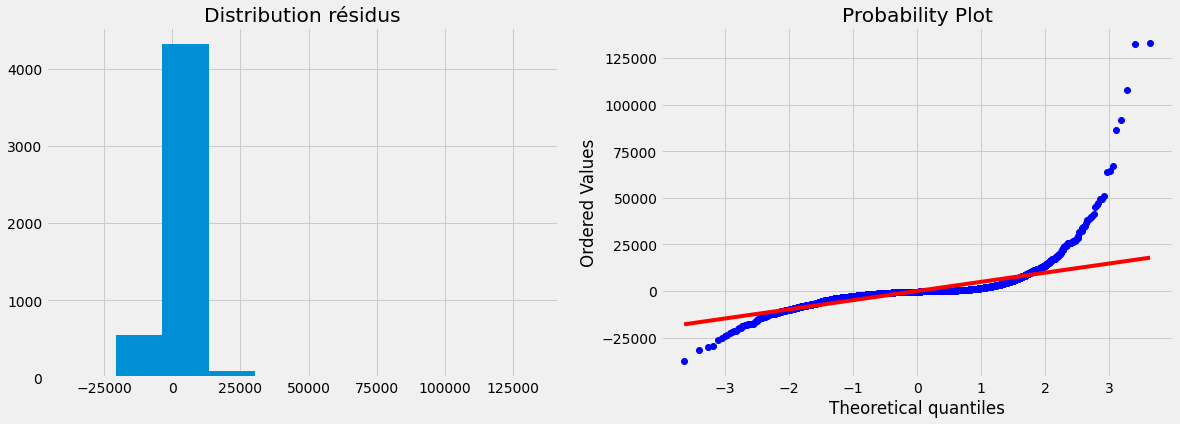

In [0]:
# graphiques 
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(model.resid)
plt.title('Distribution résidus')
plt.subplot(122)
st.probplot(model.resid, plot=plt)
plt.show()

#### Adhésion loi normale des résidus
H0 : distribution selon loi normale

In [0]:
#Kolmogorov-Smirnov
from scipy.stats import ks_2samp

print("mod.resid")
print(ks_2samp(model.resid,list(np.random.normal(np.mean(model.resid), np.std(model.resid), 1000))))


mod.resid
Ks_2sampResult(statistic=0.2738, pvalue=1.092726048068159e-54)


## LM : log_income_child ~ log_AVGincome + gini + log_income_parent

In [0]:
X = sample[['log_AVGincome','gini','log_income_parent']] 
Y = sample['log_income_child']

X = sm.add_constant(X) #  constant

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       log_income_child   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     6211.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:09:19   Log-Likelihood:                -676.21
No. Observations:                5000   AIC:                             1360.
Df Residuals:                    4996   BIC:                             1386.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1173      0.03

### Atypicité des observations

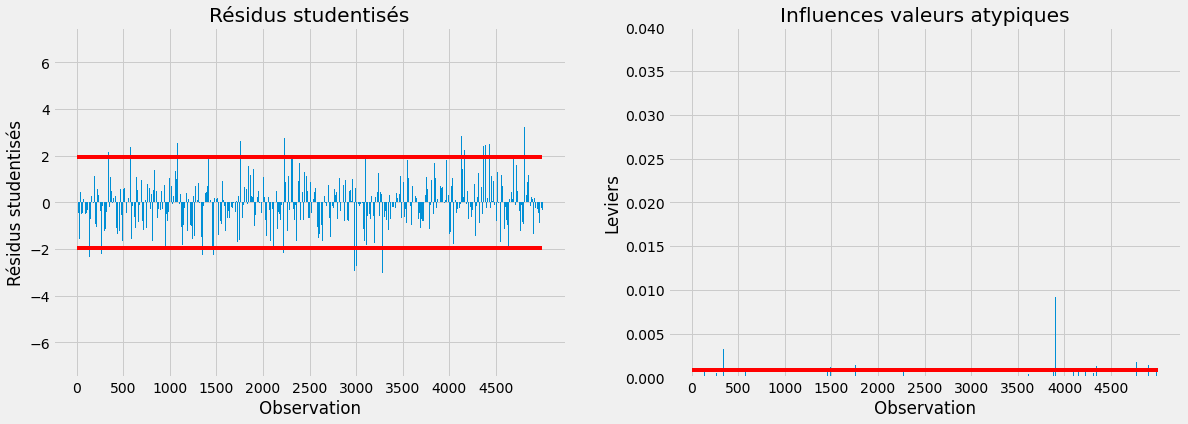

In [0]:
# Sélection du seuil
alpha = 0.05

# nb observation
n = sample.shape[0]

# nb variables
p = 3

#création df analyse
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

# Calcul levier, résidus studentisés et Cook
analyses['levier'] = model.get_influence().hat_matrix_diag
analyses['rstudent'] = model.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
influence = model.get_influence().summary_frame()
analyses['dcooks'] = influence['cooks_d']

# Calcul des seuils
seuil_levier = 2*p/n
seuil_dcook = 4/(n-p)
#Sélection observations atypiques
atypiques = analyses.loc[(analyses['rstudent'] > seuil_rstudent) | (analyses['rstudent'] < -seuil_rstudent), :]

# graphiques Résidus et distance cooks
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, n-1], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, n-1], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.ylim(-7.5, 7.5)
plt.title('Résidus studentisés')
plt.subplot(122)
plt.bar(atypiques['obs'], atypiques['dcooks'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, n-1], [seuil_dcook, seuil_dcook], color='r')
plt.ylim(0, 0.04)
plt.title('Influences valeurs atypiques')
plt.show()

In [0]:
# sélection observations atypiques et influentes
influentes = atypiques.loc[atypiques['dcooks'] > seuil_dcook, :]

#Calcul % d'observation atypiques et influentes
perct = (len(influentes)/len(sample))*100
print(len(influentes))
print(perct)

197
3.94


### Colinéarité des variables




In [0]:
variables = model.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[3.5928915024773387, 1.124307402666222, 3.742184358692843]

### Homoscédasticité

#### Variances résidus


Text(0.5, 1.0, 'Variance des résidus')

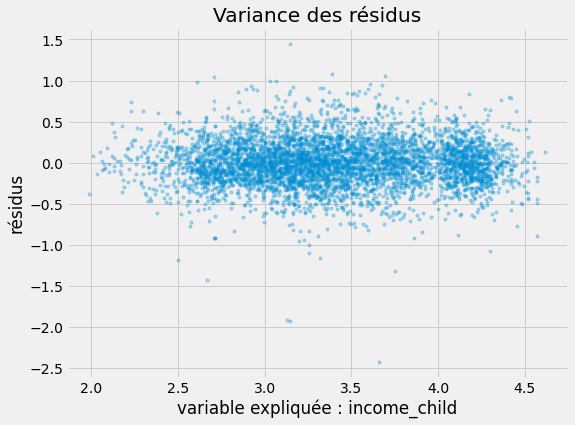

In [0]:
fig = plt.figure(figsize=(8,6))
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.3)
plt.xlabel('variable expliquée : income_child')
_ = plt.ylabel('résidus')
plt.title('Variance des résidus')

In [0]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(model.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 1.1786761184759878e-37


### Normalité des résidus

#### Distribution des résidus

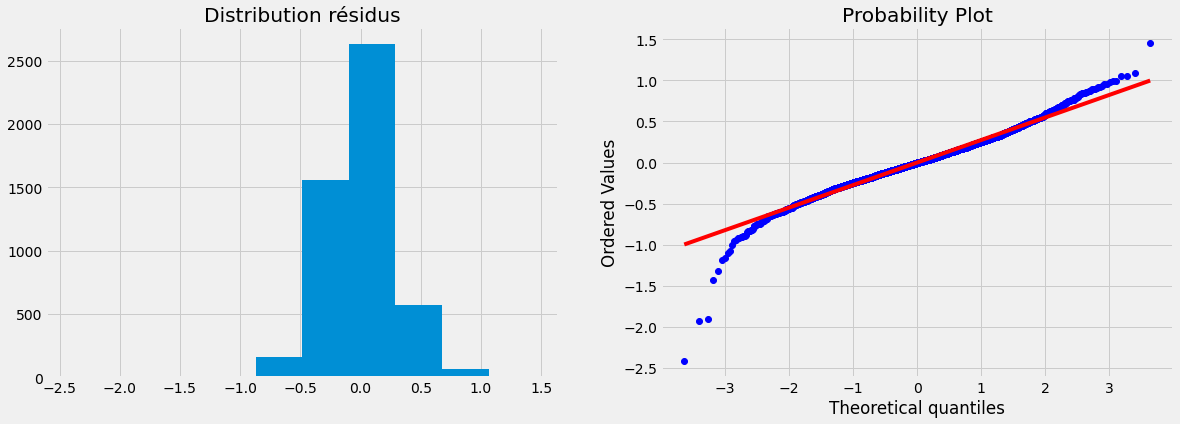

In [0]:
# graphiques 
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(model.resid)
plt.title('Distribution résidus')
plt.subplot(122)
st.probplot(model.resid, plot=plt)
plt.show()

#### Adhésion loi normale des résidus
H0 : distribution selon loi normale

In [0]:
#Kolmogorov-Smirnov
from scipy.stats import ks_2samp

print("mod.resid")
print(ks_2samp(model.resid,list(np.random.normal(np.mean(model.resid), np.std(model.resid), 1000))))


mod.resid
Ks_2sampResult(statistic=0.0532, pvalue=1.0)


In [0]:
list_influentes = influentes.index
list_influentes

Int64Index([  25,   60,   85,   90,  107,  142,  161,  178,  207,  209,
            ...
            4801, 4806, 4811, 4829, 4862, 4874, 4880, 4901, 4914, 4931],
           dtype='int64', length=197)

In [0]:
sample_clean = sample.drop(list_influentes)
sample_clean.shape

(4803, 19)

## LM : (Cleaned) log_income_child ~ log_AVGincome + gini + log_income_parent

In [0]:
X = sample_clean[['log_AVGincome','gini','log_income_parent']] 
Y = sample_clean['log_income_child']

X = sm.add_constant(X) #  constant

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       log_income_child   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     8489.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:09:38   Log-Likelihood:                 175.81
No. Observations:                4803   AIC:                            -343.6
Df Residuals:                    4799   BIC:                            -317.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1104      0.03

### Atypicité des observations

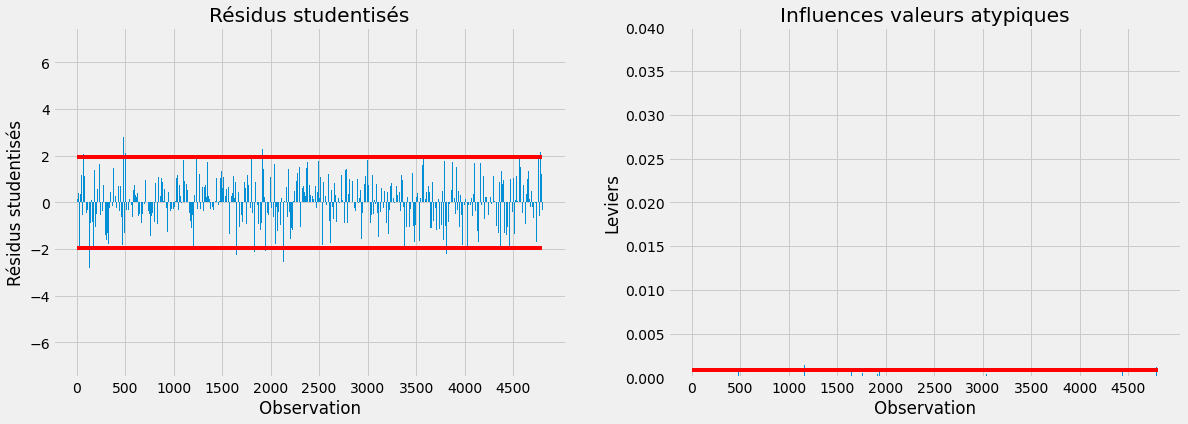

In [0]:
# Sélection du seuil
alpha = 0.05

# nb observation
n = sample_clean.shape[0]

# nb variables
p = 3

#création df analyse
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

# Calcul levier, résidus studentisés et Cook
analyses['levier'] = model.get_influence().hat_matrix_diag
analyses['rstudent'] = model.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
influence = model.get_influence().summary_frame()
analyses['dcooks'] = influence['cooks_d']

# Calcul des seuils
seuil_levier = 2*p/n
seuil_dcook = 4/(n-p)
#Sélection observations atypiques
atypiques = analyses.loc[(analyses['rstudent'] > seuil_rstudent) | (analyses['rstudent'] < -seuil_rstudent), :]

# graphiques Résidus et distance cooks
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, n-1], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, n-1], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.ylim(-7.5, 7.5)
plt.title('Résidus studentisés')
plt.subplot(122)
plt.bar(atypiques['obs'], atypiques['dcooks'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, n-1], [seuil_dcook, seuil_dcook], color='r')
plt.ylim(0, 0.04)
plt.title('Influences valeurs atypiques')
plt.show()

In [0]:
# sélection observations atypiques et influentes
influentes = atypiques.loc[atypiques['dcooks'] > seuil_dcook, :]

#Calcul % d'observation atypiques et influentes
perct = (len(influentes)/len(sample))*100
print(len(influentes))
print(perct)

17
0.33999999999999997


### Colinéarité des variables




In [0]:
variables = model.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[3.8679564465295297, 1.131432372726496, 4.032148838463269]

### Homoscédasticité

#### Variances résidus


Text(0.5, 1.0, 'Variance des résidus')

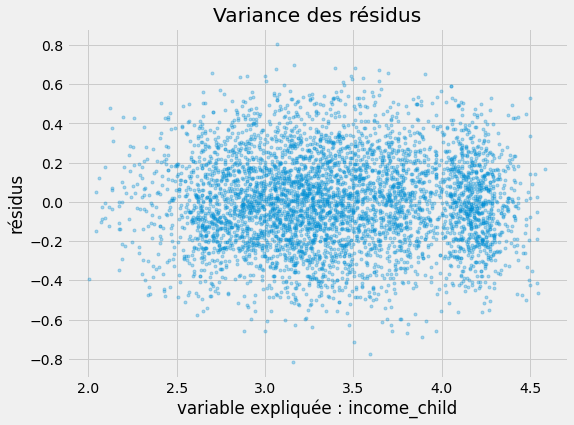

In [0]:
fig = plt.figure(figsize=(8,6))
plt.plot(model.fittedvalues, model.resid, '.', alpha=0.3)
plt.xlabel('variable expliquée : income_child')
_ = plt.ylabel('résidus')
plt.title('Variance des résidus')

In [0]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(model.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 1.8727376906104905e-27


### Normalité des résidus

#### Distribution des résidus

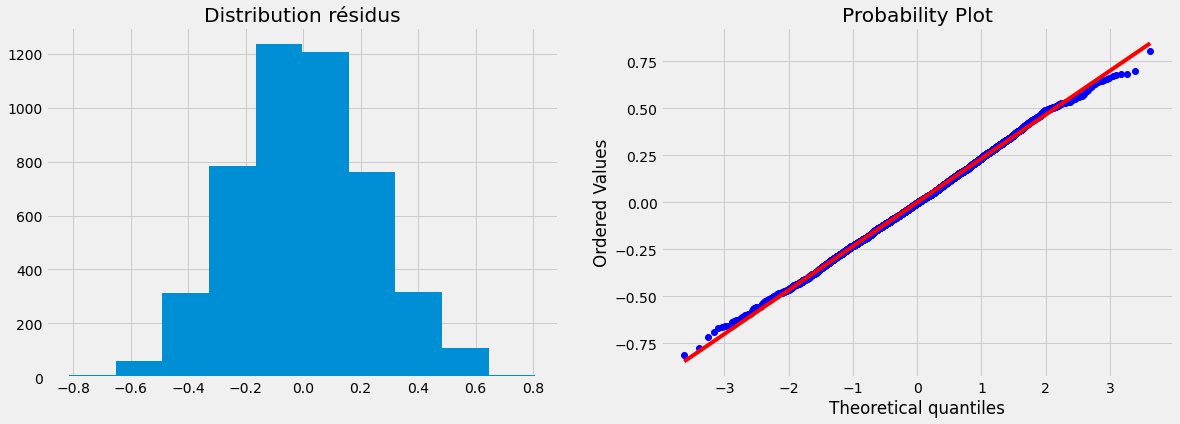

In [0]:
# graphiques 
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(model.resid)
plt.title('Distribution résidus')
plt.subplot(122)
st.probplot(model.resid, plot=plt)
plt.show()

#### Adhésion loi normale des résidus
H0 : distribution selon loi normale

In [0]:
#Kolmogorov-Smirnov
from scipy.stats import ks_2samp

print("mod.resid")
print(ks_2samp(model.resid,list(np.random.normal(np.mean(model.resid), np.std(model.resid), 1000))))


mod.resid
Ks_2sampResult(statistic=0.034259212991880075, pvalue=1.0)


# FIN